In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
# Load the stock price data from a CSV file
data = pd.read_csv('/content/AAPL.csv')

# Extract the 'Close' prices
stock_prices = data['Close'].values.reshape(-1, 1)

In [21]:
# Normalize the stock prices
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(stock_prices)

# Split the data into training and testing sets
train_size = int(len(normalized_prices) * 0.8)
train_data = normalized_prices[:train_size]
test_data = normalized_prices[train_size:]

In [22]:
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback, 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

lookback = 30  # Number of previous days' prices to use as input
X_train, y_train = create_dataset(train_data, lookback)

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
260/260 [==============================] - 13s 32ms/step - loss: 1.8061e-05
Epoch 2/50
260/260 [==============================] - 9s 34ms/step - loss: 3.2423e-06
Epoch 3/50
260/260 [==============================] - 7s 28ms/step - loss: 2.6265e-06
Epoch 4/50
260/260 [==============================] - 9s 34ms/step - loss: 2.4755e-06
Epoch 5/50
260/260 [==============================] - 9s 35ms/step - loss: 2.2213e-06
Epoch 6/50
260/260 [==============================] - 7s 29ms/step - loss: 2.1119e-06
Epoch 7/50
260/260 [==============================] - 10s 37ms/step - loss: 1.9887e-06
Epoch 8/50
260/260 [==============================] - 9s 33ms/step - loss: 2.0243e-06
Epoch 9/50
260/260 [==============================] - 8s 31ms/step - loss: 1.7145e-06
Epoch 10/50
260/260 [==============================] - 9s 35ms/step - loss: 1.5473e-06
Epoch 11/50
260/260 [==============================] - 9s 33ms/step - loss: 1.4604e-06
Epoch 12/50
260/260 [=============================

65/65 [==============================] - 2s 10ms/step


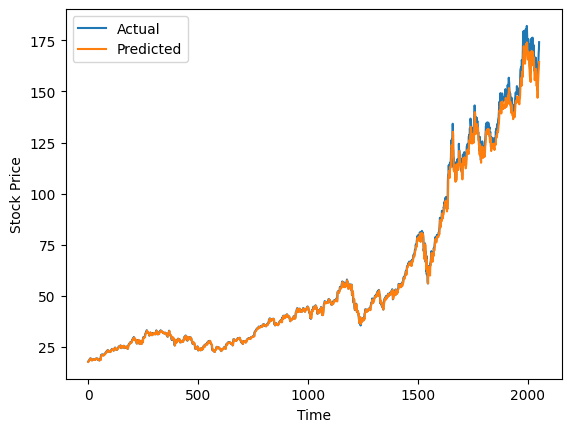

In [18]:
# Prepare the testing dataset
X_test, y_test = create_dataset(test_data, lookback)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the actual and predicted prices
plt.plot(stock_prices[train_size+lookback:], label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()